# Importar  bases de datos desde google drive 

In [1]:
import pandas as pd 
import numpy as np 
pd.set_option('display.max_columns', None)

In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
 #!pip install 'openpyxl==3.0.0'

In [5]:
sales_data_sample=pd.read_excel(r'/content/gdrive/My Drive/data/data.xlsx')

In [6]:
sales_data_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


# Unificando Fecha 

In [7]:
# Validate if the months are logical and complete 
sales_data_sample.MONTH_ID.value_counts()

11    597
10    317
5     252
1     229
2     224
3     212
8     191
12    180
4     178
9     171
7     141
6     131
Name: MONTH_ID, dtype: int64

In [8]:
# Validate if the years are logical and complete 
sales_data_sample.YEAR_ID.value_counts()

2004    1345
2003    1000
2005     478
Name: YEAR_ID, dtype: int64

In [9]:
# Validate if the quarters are logical and complete 
sales_data_sample.QTR_ID.value_counts()

4    1094
1     665
2     561
3     503
Name: QTR_ID, dtype: int64

In [10]:
sales_data_sample['month']=[str(x) for x in sales_data_sample['MONTH_ID']] 
sales_data_sample['year']=[str(x) for x in sales_data_sample['YEAR_ID']]

In [11]:
sales_data_sample['date']= sales_data_sample['month']+'/'+sales_data_sample['year']

In [12]:
sales_data_sample['date']=pd.to_datetime(sales_data_sample['date'])

# Analisis descriptivo de los datos 

In [13]:
sales_data_sample['total_amount']=(sales_data_sample.QUANTITYORDERED * sales_data_sample.PRICEEACH)

In [14]:
sales_data_sample.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,month,year,date,total_amount
0,10100,30,100.00,3,5151.00,1/6/2003 0:00,Shipped,1,1,2003,Vintage Cars,170,S18_1749,Online Diecast Creations Co.,6035558647,2304 Long Airport Avenue,NaN,Nashua,NH,62005,USA,NaN,Young,Valarie,Medium,1,2003,2003-01-01,3000.00
1,10100,50,67.80,2,3390.00,1/6/2003 0:00,Shipped,1,1,2003,Vintage Cars,60,S18_2248,Online Diecast Creations Co.,6035558647,2304 Long Airport Avenue,NaN,Nashua,NH,62005,USA,NaN,Young,Valarie,Medium,1,2003,2003-01-01,3390.00
2,10100,22,86.51,4,1903.22,1/6/2003 0:00,Shipped,1,1,2003,Vintage Cars,92,S18_4409,Online Diecast Creations Co.,6035558647,2304 Long Airport Avenue,NaN,Nashua,NH,62005,USA,NaN,Young,Valarie,Small,1,2003,2003-01-01,1903.22
3,10100,49,34.47,1,1689.03,1/6/2003 0:00,Shipped,1,1,2003,Vintage Cars,41,S24_3969,Online Diecast Creations Co.,6035558647,2304 Long Airport Avenue,NaN,Nashua,NH,62005,USA,NaN,Young,Valarie,Small,1,2003,2003-01-01,1689.03
4,10101,25,100.00,4,3782.00,1/9/2003 0:00,Shipped,1,1,2003,Vintage Cars,127,S18_2325,"Blauer See Auto, Co.",+49 69 66 90 2555,Lyonerstr. 34,NaN,Frankfurt,NaN,60528,Germany,EMEA,Keitel,Roland,Medium,1,2003,2003-01-01,2500.00


In [15]:

numeric_data = sales_data_sample.select_dtypes(include=[np.number])
categorical_data = sales_data_sample.select_dtypes(exclude=[np.number])

In [16]:
numeric_data.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP,total_amount
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551,2936.906408
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912,1105.644284
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000,482.130000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000,2100.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000,2800.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000,3726.810000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000,9048.160000


## Analisis Datos Numericos 

In [17]:
import seaborn as sns 

In [18]:
sns.set(rc = {'figure.figsize':(15,8)})


In [19]:
anios = [2003,2005]
#df_SECOP_leticia = df_SECOP[(df_SECOP['Ciudad Entidad'] == "Leticia") & (df_SECOP['Año'].isin(anios)) & (df_SECOP['Adjudicado'] == "Si")]

sales_data_sample_anios = sales_data_sample[(sales_data_sample['YEAR_ID'].isin(anios))] 

conteo_2003_2005 = pd.pivot_table(sales_data_sample_anios, 
                                values='total_amount', 
                                index=['YEAR_ID','MONTH_ID'],
                                #columns=['NombreMes'], 
                                aggfunc=np.sum)

conteo_2003_2005 = pd.DataFrame(conteo_2003_2005)
conteo_2003_2005.reset_index(inplace=True)
conteo_2003_2005 = conteo_2003_2005.rename(columns = {'index':'YEAR_ID','total_amount':'Valor'})
conteo_2003_2005.dtypes

YEAR_ID       int64
MONTH_ID      int64
Valor       float64
dtype: object

In [25]:
plt=sns.lineplot(data=conteo_2003_2005, x="YEAR_ID", y="Valor", hue="MONTH_ID")
plt.ticklabel_format(style='plain', axis='y')
plt.legend(loc='upper left')
ax = plt.gca()
ax.yaxis.set_major_formatter('${x:1.0f}')
plt.show()

ValueError: ignored

In [22]:
anios = [2003,2005]
#df_SECOP_leticia = df_SECOP[(df_SECOP['Ciudad Entidad'] == "Leticia") & (df_SECOP['Año'].isin(anios)) & (df_SECOP['Adjudicado'] == "Si")]

sales_data_sample_anios = sales_data_sample[(sales_data_sample['YEAR_ID'].isin(anios))] 

conteo_2003_2005 = pd.pivot_table(sales_data_sample_anios, 
                                values='total_amount', 
                                index=['YEAR_ID','COUNTRY'],
                                #columns=['NombreMes'], 
                                aggfunc=np.sum)

conteo_2003_2005 = pd.DataFrame(conteo_2003_2005)
conteo_2003_2005.reset_index(inplace=True)
conteo_2003_2005 = conteo_2003_2005.rename(columns = {'index':'YEAR_ID','total_amount':'Valor'})
conteo_2003_2005.dtypes

YEAR_ID      int64
COUNTRY     object
Valor      float64
dtype: object

AttributeError: ignored

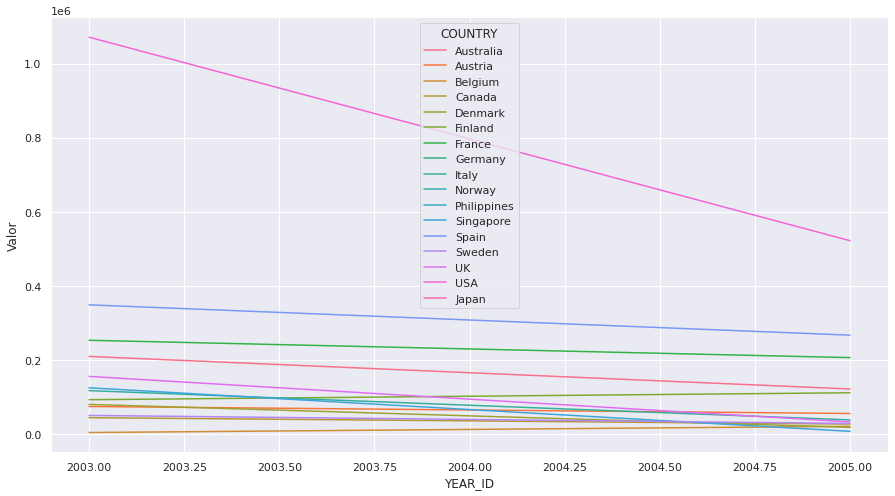

In [26]:
sns.lineplot(data=conteo_2003_2005, x="YEAR_ID", y="Valor", hue="COUNTRY")
sns.color_palette()
plt.ticklabel_format(style='plain', axis='y')
plt.legend(loc='upper left')
ax = plt.gca()
ax.yaxis.set_major_formatter('${x:1.0f}')
plt.show()

In [27]:
anios = [2003,2005]
#df_SECOP_leticia = df_SECOP[(df_SECOP['Ciudad Entidad'] == "Leticia") & (df_SECOP['Año'].isin(anios)) & (df_SECOP['Adjudicado'] == "Si")]

sales_data_sample_anios = sales_data_sample[(sales_data_sample['YEAR_ID'].isin(anios))] 

conteo_2003_2005 = pd.pivot_table(sales_data_sample_anios, 
                                values='total_amount', 
                                index=['YEAR_ID','PRODUCTLINE'],
                                #columns=['NombreMes'], 
                                aggfunc=np.sum)

conteo_2003_2005 = pd.DataFrame(conteo_2003_2005)
conteo_2003_2005.reset_index(inplace=True)
conteo_2003_2005 = conteo_2003_2005.rename(columns = {'index':'YEAR_ID','total_amount':'Valor'})
conteo_2003_2005.dtypes

YEAR_ID          int64
PRODUCTLINE     object
Valor          float64
dtype: object

AttributeError: ignored

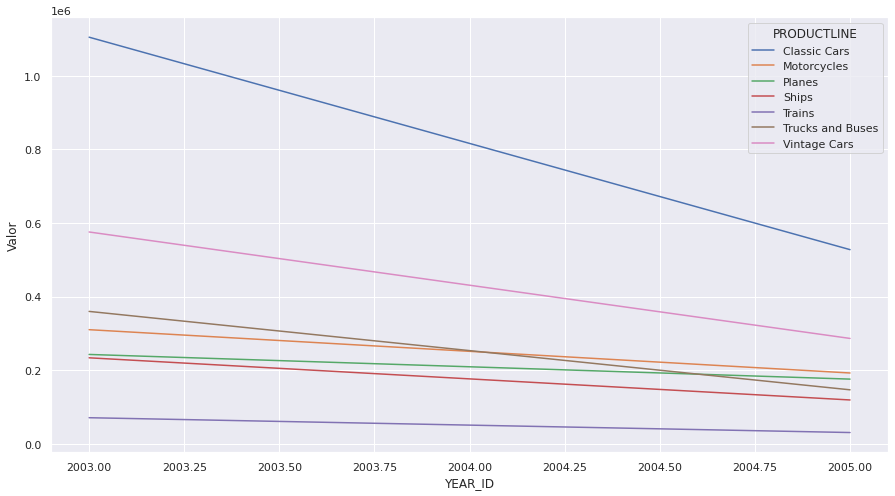

In [28]:
sns.lineplot(data=conteo_2003_2005, x="YEAR_ID", y="Valor", hue="PRODUCTLINE")
plt.ticklabel_format(style='plain', axis='y')
plt.legend(loc='upper left')
ax = plt.gca()
ax.yaxis.set_major_formatter('${x:1.0f}')
plt.show()

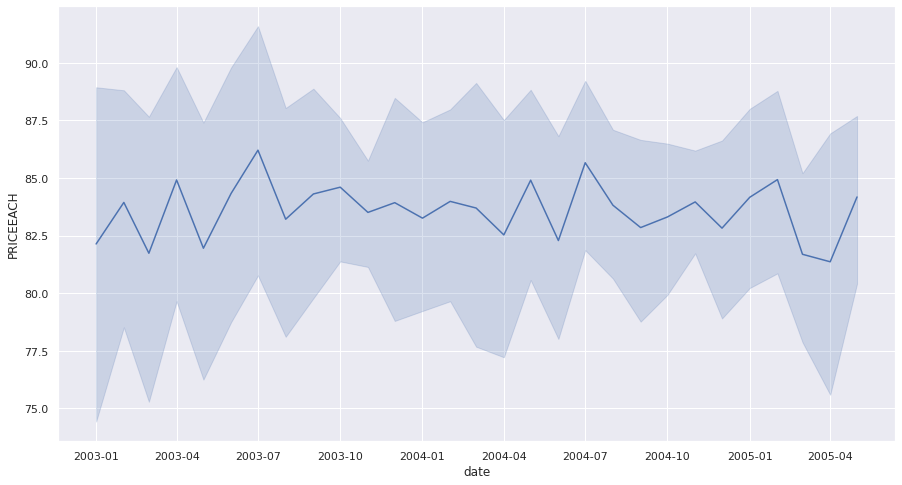

In [29]:

sns.lineplot( x='date', y='PRICEEACH',data=sales_data_sample)

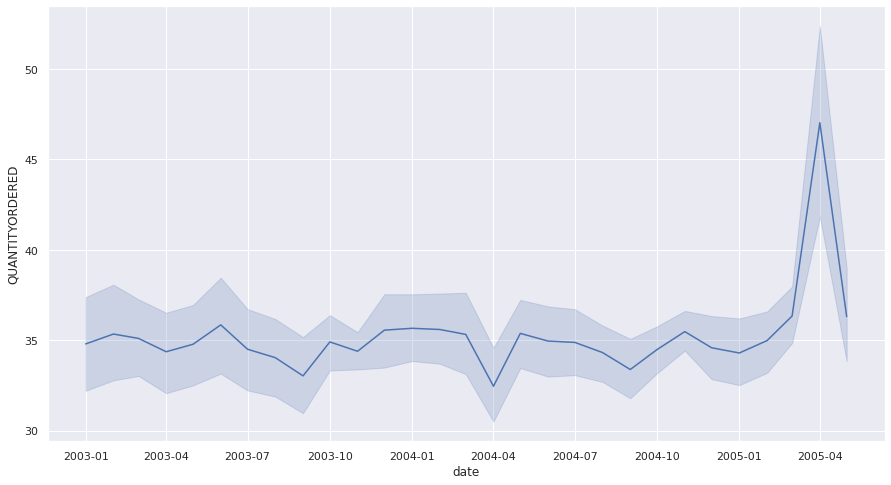

In [30]:

sns.lineplot( x='date', y='QUANTITYORDERED',data=sales_data_sample)


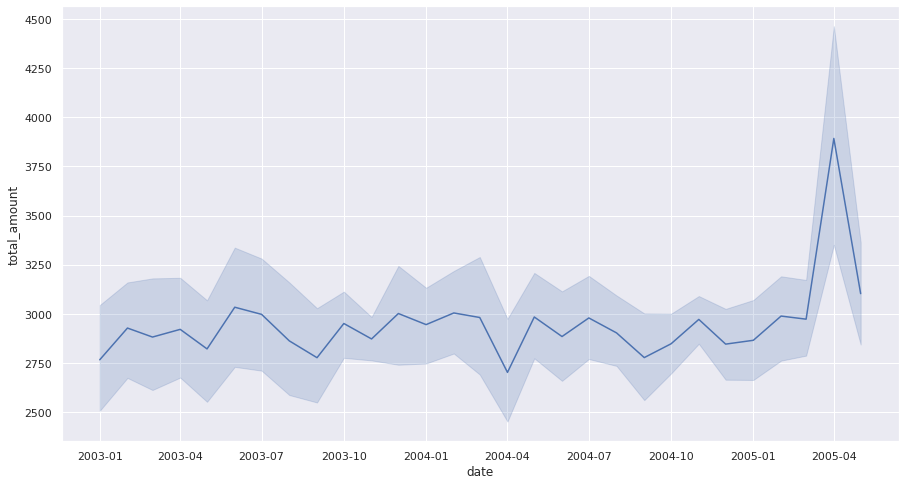

In [31]:
sns.lineplot( x='date', y='total_amount',data=sales_data_sample)

In [32]:
sales_data_sample.head(10)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,month,year,date,total_amount
0,10100,30,100.00,3,5151.00,1/6/2003 0:00,Shipped,1,1,2003,Vintage Cars,170,S18_1749,Online Diecast Creations Co.,6035558647,2304 Long Airport Avenue,NaN,Nashua,NH,62005,USA,NaN,Young,Valarie,Medium,1,2003,2003-01-01,3000.00
1,10100,50,67.80,2,3390.00,1/6/2003 0:00,Shipped,1,1,2003,Vintage Cars,60,S18_2248,Online Diecast Creations Co.,6035558647,2304 Long Airport Avenue,NaN,Nashua,NH,62005,USA,NaN,Young,Valarie,Medium,1,2003,2003-01-01,3390.00
2,10100,22,86.51,4,1903.22,1/6/2003 0:00,Shipped,1,1,2003,Vintage Cars,92,S18_4409,Online Diecast Creations Co.,6035558647,2304 Long Airport Avenue,NaN,Nashua,NH,62005,USA,NaN,Young,Valarie,Small,1,2003,2003-01-01,1903.22
3,10100,49,34.47,1,1689.03,1/6/2003 0:00,Shipped,1,1,2003,Vintage Cars,41,S24_3969,Online Diecast Creations Co.,6035558647,2304 Long Airport Avenue,NaN,Nashua,NH,62005,USA,NaN,Young,Valarie,Small,1,2003,2003-01-01,1689.03
4,10101,25,100.00,4,3782.00,1/9/2003 0:00,Shipped,1,1,2003,Vintage Cars,127,S18_2325,"Blauer See Auto, Co.",+49 69 66 90 2555,Lyonerstr. 34,NaN,Frankfurt,NaN,60528,Germany,EMEA,Keitel,Roland,Medium,1,2003,2003-01-01,2500.00
5,10101,26,100.00,1,3773.38,1/9/2003 0:00,Shipped,1,1,2003,Vintage Cars,168,S18_2795,"Blauer See Auto, Co.",+49 69 66 90 2555,Lyonerstr. 34,NaN,Frankfurt,NaN,60528,Germany,EMEA,Keitel,Roland,Medium,1,2003,2003-01-01,2600.00
6,10101,45,31.20,3,1404.00,1/9/2003 0:00,Shipped,1,1,2003,Vintage Cars,33,S24_1937,"Blauer See Auto, Co.",+49 69 66 90 2555,Lyonerstr. 34,NaN,Frankfurt,NaN,60528,Germany,EMEA,Keitel,Roland,Small,1,2003,2003-01-01,1404.00
7,10101,46,53.76,2,2472.96,1/9/2003 0:00,Shipped,1,1,2003,Vintage Cars,44,S24_2022,"Blauer See Auto, Co.",+49 69 66 90 2555,Lyonerstr. 34,NaN,Frankfurt,NaN,60528,Germany,EMEA,Keitel,Roland,Small,1,2003,2003-01-01,2472.96
8,10102,39,100.00,2,4808.31,1/10/2003 0:00,Shipped,1,1,2003,Vintage Cars,102,S18_1342,Vitachrome Inc.,2125551500,2678 Kingston Rd.,Suite 101,NYC,NY,10022,USA,NaN,Frick,Michael,Medium,1,2003,2003-01-01,3900.00
9,10102,41,50.14,1,2055.74,1/10/2003 0:00,Shipped,1,1,2003,Vintage Cars,53,S18_1367,Vitachrome Inc.,2125551500,2678 Kingston Rd.,Suite 101,NYC,NY,10022,USA,NaN,Frick,Michael,Small,1,2003,2003-01-01,2055.74


# Generando tabla RFM

In [33]:
# Check for missing values in the dataset
sales_data_sample.isnull().sum(axis=0)

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
month                  0
year                   0
date                   0
total_amount           0
dtype: int64

In [34]:
# Validate if there is any negative values in Quantity
sales_data_sample.QUANTITYORDERED.min()



6

In [35]:
# Validate if there is any negative values in Quantity
sales_data_sample.QUANTITYORDERED.min()


6

In [36]:
# Existe una diferencia entre  sales y la multiplicacion de sales 
# por la cantidad ordenada y parece ser una cantidad en los valores despues del 0 

(sales_data_sample.SALES-(sales_data_sample.QUANTITYORDERED * sales_data_sample.PRICEEACH)).value_counts() 

 0.000000e+00    1126
-4.547474e-13     117
 4.547474e-13     103
 2.273737e-13      78
-2.273737e-13      73
                 ... 
 1.357200e+02       1
 4.200000e+01       1
 2.235800e+03       1
 1.469880e+03       1
 9.594000e+01       1
Length: 1299, dtype: int64

In [37]:
import datetime as dt

In [38]:
sales_data_sample['date'].value_counts()

2004-11-01    301
2003-11-01    296
2004-10-01    159
2003-10-01    158
2004-08-01    133
2005-05-01    120
2004-12-01    110
2005-03-01    106
2005-01-01     99
2005-02-01     97
2004-09-01     95
2004-01-01     91
2004-07-01     91
2004-02-01     86
2004-06-01     85
2003-09-01     76
2004-05-01     74
2003-12-01     70
2004-04-01     64
2003-05-01     58
2003-08-01     58
2003-04-01     58
2005-04-01     56
2004-03-01     56
2003-07-01     50
2003-03-01     50
2003-06-01     46
2003-02-01     41
2003-01-01     39
Name: date, dtype: int64

In [39]:
import datetime as dt 

In [40]:
# Create de Latest date in order to adbocate to frecuency 
latest_date = dt.datetime(2005,6,1)

In [41]:
#Create RFM Modeling scores for each costumer
RFMScores = sales_data_sample.groupby('CUSTOMERNAME').agg({'date': lambda x: (latest_date - x.max()).days,'ORDERNUMBER': lambda x: len(x), 'total_amount': lambda x: x.sum()})
#Convert invoice Date into type int
RFMScores['date'] = RFMScores['date'].astype(int)
#Rename column names to Recency, Frequency and monetary 
RFMScores.rename(columns={'date': 'Recency', 
                         'ORDERNUMBER': 'Frequency', 
                         'total_amount': 'Monetary'}, inplace=True)

RFMScores.reset_index().head()

,CUSTOMERNAME,Recency,Frequency,Monetary
0,"AV Stores, Co.",212,51,136873.25
1,Alpha Cognac,92,20,58885.28
2,Amica Models & Co.,273,26,72645.01
3,"Anna's Decorations, Ltd",92,46,121260.41
4,Atelier graphique,212,7,21213.16


In [42]:
RFMScores['Recency']

CUSTOMERNAME
AV Stores, Co.                 212
Alpha Cognac                    92
Amica Models & Co.             273
Anna's Decorations, Ltd         92
Atelier graphique              212
                              ... 
Vida Sport, Ltd                304
Vitachrome Inc.                212
Volvo Model Replicas, Co       212
West Coast Collectables Co.    517
giftsbymail.co.uk              212
Name: Recency, Length: 92, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


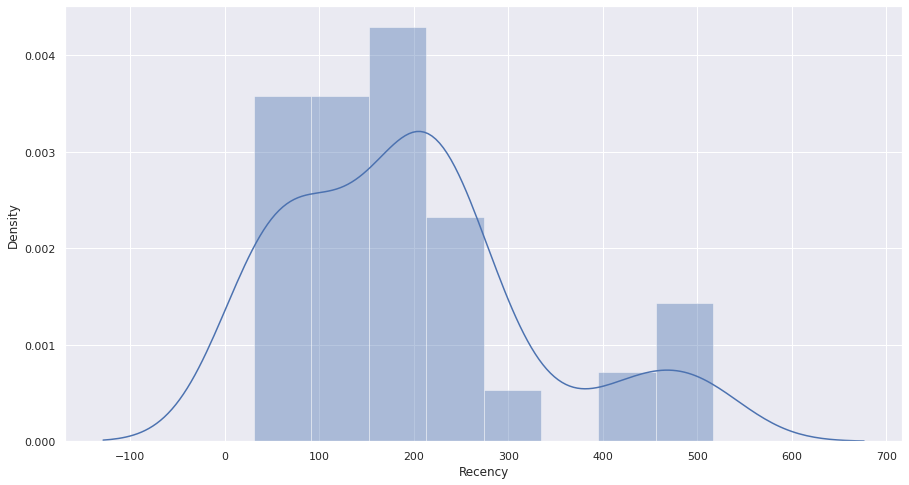

In [43]:
# Recency distribution plot
import seaborn as sns
x = RFMScores['Recency']

ax = sns.distplot(x)

In [44]:
#Descriptive Statistic(Recency)
RFMScores.Recency.describe()

count     92.000000
mean     196.086957
std      131.350103
min       31.000000
25%       92.000000
50%      212.000000
75%      243.000000
max      517.000000
Name: Recency, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


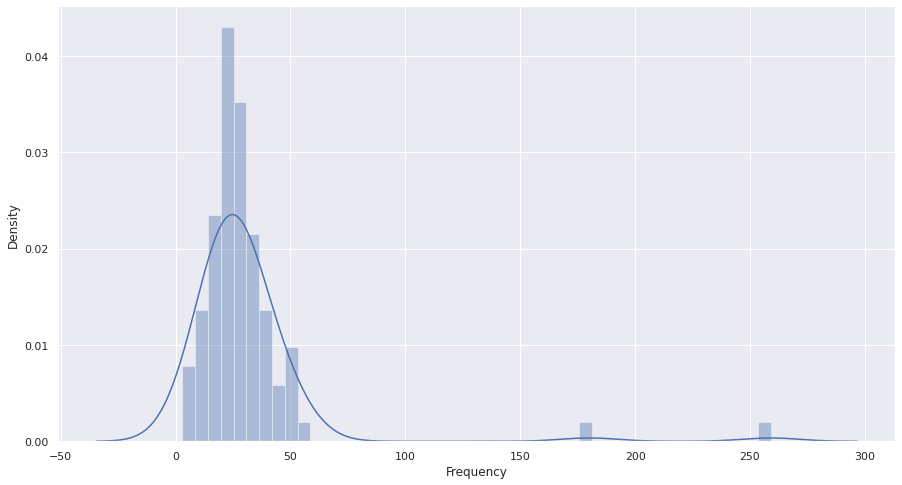

In [45]:
#Frequency distribution plot, taking observations which have frequency less than 1000
import seaborn as sns
x = RFMScores.query('Frequency < 1000')['Frequency']

ax = sns.distplot(x)

In [46]:
#Descriptive Statistics (Monetary)
RFMScores.Monetary.describe()


count        92.000000
mean      90118.334674
std       91393.848231
min        8642.150000
25%       56842.287500
50%       73946.260000
75%       96460.090000
max      766195.050000
Name: Monetary, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


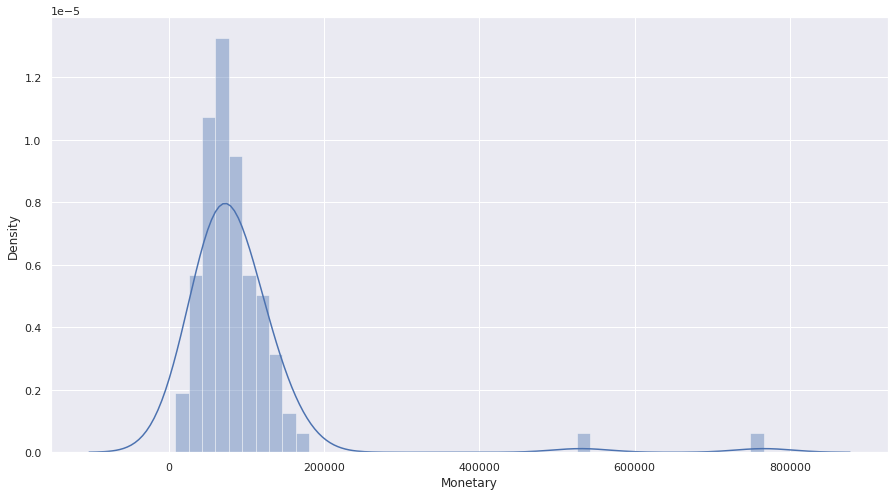

In [47]:
#Monateray distribution plot, taking observations which have monetary value less than 10000
import seaborn as sns
x = RFMScores['Monetary']

ax = sns.distplot(x)

In [48]:
#Split into four segments using quantiles
quantiles = RFMScores.quantile(q=[0.2,0.4,0.6,0.8])
quantiles = quantiles.to_dict()

In [49]:
quantiles

{'Frequency': {0.2: 18.0, 0.4: 23.0, 0.6: 27.0, 0.8: 36.0},
 'Monetary': {0.2: 53816.106,
  0.4: 67032.97,
  0.6: 79531.41200000001,
  0.8: 108189.20199999998},
 'Recency': {0.2: 61.0, 0.4: 151.0, 0.6: 212.0, 0.8: 273.0}}

In [50]:
#Functions to create R, F and M segments
def RScoring(x,p,d):
    if x <= d[p][0.2]:
        return 1
    elif x <= d[p][0.4]:
        return 2
    elif x <= d[p][0.6]: 
        return 3
    elif  x <= d[p][0.8]: 
        return 4    
    else:
        return 5
    
def FnMScoring(x,p,d):
    if x <= d[p][0.2]:
        return 5
    elif x <= d[p][0.4]:
        return 4
    elif x <= d[p][0.6]: 
        return 3
    elif  x <= d[p][0.8]: 
        return 2    
    else:
        return 1
   

In [51]:
#Calculate Add R, F and M segment value columns in the existing dataset to show R, F and M segment values
RFMScores['R'] = RFMScores['Recency'].apply(RScoring, args=('Recency',quantiles,))
RFMScores['F'] = RFMScores['Frequency'].apply(FnMScoring, args=('Frequency',quantiles,))
RFMScores['M'] = RFMScores['Monetary'].apply(FnMScoring, args=('Monetary',quantiles,))
RFMScores.head()

,Recency,Frequency,Monetary,R,F,M
CUSTOMERNAME,,,,,,
"AV Stores, Co.",212,51,136873.25,3,1,1
Alpha Cognac,92,20,58885.28,2,4,4
Amica Models & Co.,273,26,72645.01,4,3,3
"Anna's Decorations, Ltd",92,46,121260.41,2,1,1
Atelier graphique,212,7,21213.16,3,5,5


In [52]:
#Calculate and Add RFMGroup value column showing combined concatenated score of RFM
RFMScores['RFMGroup'] = RFMScores.R.map(str) + RFMScores.F.map(str) + RFMScores.M.map(str)

#Calculate and Add RFMScore value column showing total sum of RFMGroup values
RFMScores['RFMScore'] = RFMScores[['R', 'F', 'M']].sum(axis = 1)
RFMScores.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore
CUSTOMERNAME,,,,,,,,
"AV Stores, Co.",212,51,136873.25,3,1,1,311,5
Alpha Cognac,92,20,58885.28,2,4,4,244,10
Amica Models & Co.,273,26,72645.01,4,3,3,433,10
"Anna's Decorations, Ltd",92,46,121260.41,2,1,1,211,4
Atelier graphique,212,7,21213.16,3,5,5,355,13


In [53]:
#Assign Loyalty Level to each customer
Loyalty_Level = ['diamond','Platinum', 'Gold', 'Silver', 'Bronze']
Score_cuts = pd.qcut(RFMScores.RFMScore, q = 5, labels = Loyalty_Level)
RFMScores['RFM_Loyalty_Level'] = Score_cuts.values
RFMScores.reset_index().head()

,CUSTOMERNAME,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level
0,"AV Stores, Co.",212,51,136873.25,3,1,1,311,5,diamond
1,Alpha Cognac,92,20,58885.28,2,4,4,244,10,Gold
2,Amica Models & Co.,273,26,72645.01,4,3,3,433,10,Gold
3,"Anna's Decorations, Ltd",92,46,121260.41,2,1,1,211,4,diamond
4,Atelier graphique,212,7,21213.16,3,5,5,355,13,Bronze


In [54]:
#!pip install feature_engine

In [55]:
import matplotlib.pyplot as plt
from scipy import stats 
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

import plotly.offline as pyoff
import plotly.graph_objs as go 


import warnings 
warnings.filterwarnings('ignore')

In [56]:
## Function to check skewness
def check_skew(df_skew, column):
    skew = stats.skew(df_skew[column])
    skewtest = stats.skewtest(df_skew[column])
    plt.title('Distribution of ' + column)
    sns.distplot(df_skew[column])
    print("{}'s: Skew: {}, : {}".format(column, skew, skewtest))
    return

## checking skewness 

Recency's: Skew: 0.8277548880994562, : SkewtestResult(statistic=3.1116877897601922, pvalue=0.0018602111841234984)


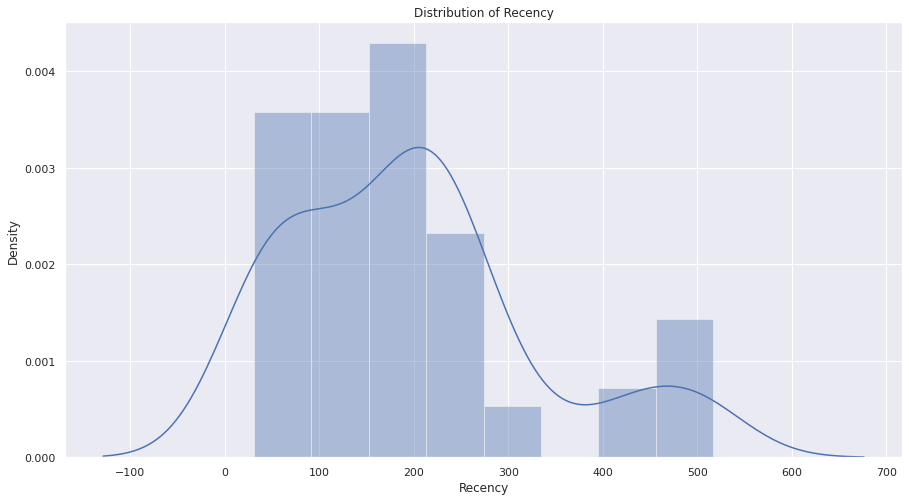

In [57]:
check_skew(RFMScores,'Recency')

Frequency's: Skew: 5.653296151215707, : SkewtestResult(statistic=9.653805927007603, pvalue=4.736448574059028e-22)


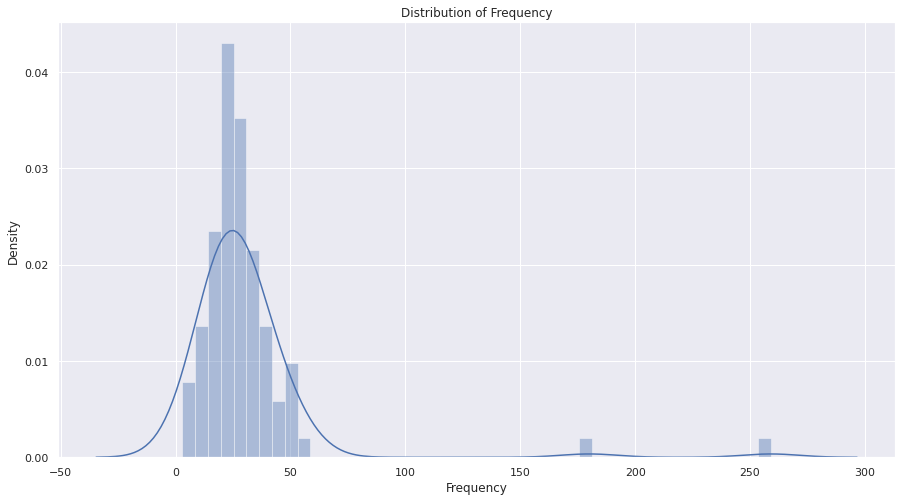

In [58]:
check_skew(RFMScores,'Frequency')

Monetary's: Skew: 5.677526777814112, : SkewtestResult(statistic=9.669973371701017, pvalue=4.044833099433862e-22)


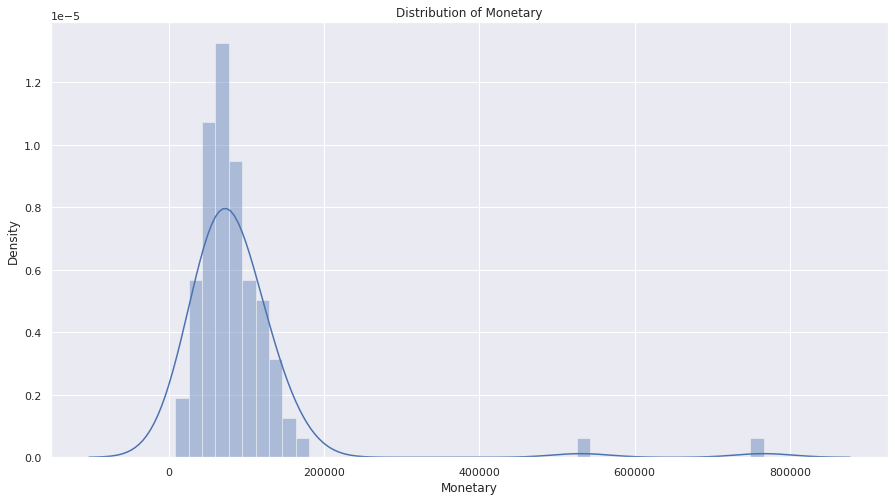

In [59]:
check_skew(RFMScores,'Monetary')


In [60]:
df_rfm_log=RFMScores[['Recency','Frequency','Monetary']]

Recency's: Skew: -0.6080948520278461, : SkewtestResult(statistic=-2.388127088551903, pvalue=0.01693448459846307)
Frequency's: Skew: 0.544503762723397, : SkewtestResult(statistic=2.1628788723145567, pvalue=0.030550497172474208)
Monetary's: Skew: 0.3290500768995308, : SkewtestResult(statistic=1.3495612349092605, pvalue=0.17715676577168882)


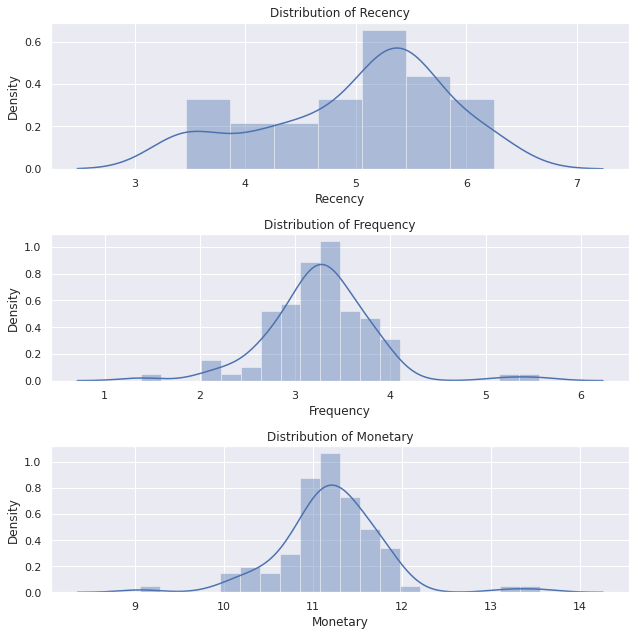

In [61]:
#Removing Skewness

df_rfm_log = np.log(df_rfm_log+1)
plt.figure(figsize=(9, 9))
plt.subplot(3, 1, 1)
check_skew(df_rfm_log,'Recency')
plt.subplot(3, 1, 2)
check_skew(df_rfm_log,'Frequency')
plt.subplot(3, 1, 3)
check_skew(df_rfm_log,'Monetary')
plt.tight_layout()

In [62]:
RFMScores.columns

Index(['Recency', 'Frequency', 'Monetary', 'R', 'F', 'M', 'RFMGroup',
       'RFMScore', 'RFM_Loyalty_Level'],
      dtype='object')

In [63]:
RFMScores_3=RFMScores.drop(columns=['Recency', 'Frequency', 'Monetary','RFMScore', 'RFM_Loyalty_Level','RFMGroup'])

In [64]:
scaler  = StandardScaler()

scaler.fit(df_rfm_log)

#store it separately for clustering 

data_rfm_standard = scaler.transform(df_rfm_log)

#turn the processed data back into dataframe 

data_rfm_standard = pd.DataFrame(data=data_rfm_standard,
                                index= RFMScores.index,
                                columns = RFMScores_3.columns)

In [65]:
data_rfm_standard

,R,F,M
CUSTOMERNAME,,,
"AV Stores, Co.",0.431501,1.238233,1.069729
Alpha Cognac,-0.593970,-0.406240,-0.385838
Amica Models & Co.,0.743137,0.049556,-0.023453
"Anna's Decorations, Ltd",-0.593970,1.054880,0.860720
Atelier graphique,0.431501,-2.156556,-2.147695
...,...,...,...
"Vida Sport, Ltd",0.875772,0.357693,0.409208
Vitachrome Inc.,0.431501,-0.018891,-0.149927
"Volvo Model Replicas, Co",0.431501,-0.494728,-0.400881


## Elbow Method 

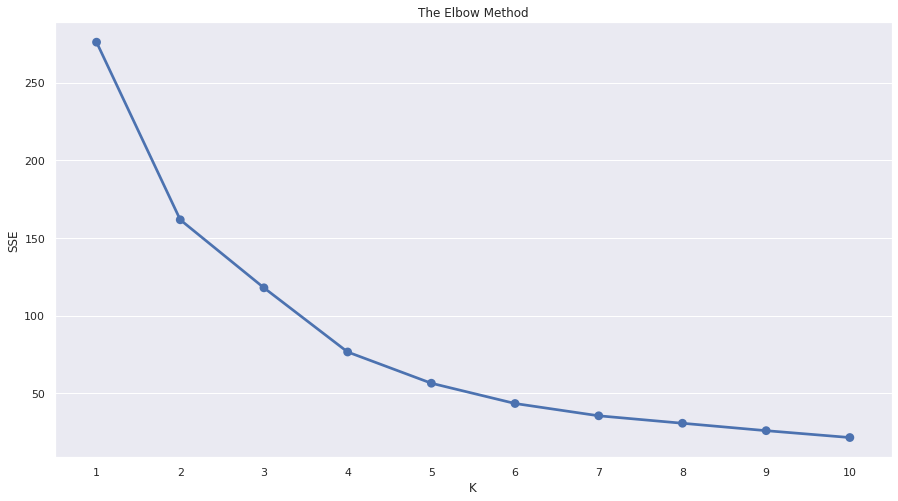

In [66]:
# fit KMeans and calculate SSe for each K 

sse = {}
for k in range (1,11):
  kmeans = KMeans(n_clusters = k, random_state=1)
  kmeans.fit(data_rfm_standard)
  sse[k]= kmeans.inertia_

#plot sse for each k 

plt.title('The Elbow Method')
plt.xlabel('K');plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()),y=list(sse.values()))
plt.show()

## Silhouette Method 

In [67]:
import sklearn.cluster as cluster 
import sklearn.metrics as metrics

In [68]:
for i in range(2,13):
    labels=cluster.KMeans(n_clusters=i,init="k-means++",random_state=200).fit(data_rfm_standard).labels_
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(data_rfm_standard,labels,metric="euclidean",sample_size=1000,random_state=200)))

Silhouette score for k(clusters) = 2 is 0.3857627479583664
Silhouette score for k(clusters) = 3 is 0.39024261915335645
Silhouette score for k(clusters) = 4 is 0.417521683908992
Silhouette score for k(clusters) = 5 is 0.3941435835337486
Silhouette score for k(clusters) = 6 is 0.39820140003371896
Silhouette score for k(clusters) = 7 is 0.3921559359399319
Silhouette score for k(clusters) = 8 is 0.394663734784449
Silhouette score for k(clusters) = 9 is 0.4085734050046137
Silhouette score for k(clusters) = 10 is 0.3734742991952125
Silhouette score for k(clusters) = 11 is 0.4247915076946917
Silhouette score for k(clusters) = 12 is 0.4052999426334871


In [69]:
kmeans =KMeans(n_clusters=4,random_state=1)
#compute kmeans clustering on pre-processed data 

kmeans.fit(data_rfm_standard)
#extract cluster labels from labels_ attributa

cluster_labels = kmeans.labels_

In [70]:
df_k3 = RFMScores.assign(Cluster = cluster_labels)

In [71]:
df_k3

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level,Cluster
CUSTOMERNAME,,,,,,,,,,
"AV Stores, Co.",212,51,136873.25,3,1,1,311,5,diamond,1
Alpha Cognac,92,20,58885.28,2,4,4,244,10,Gold,1
Amica Models & Co.,273,26,72645.01,4,3,3,433,10,Gold,1
"Anna's Decorations, Ltd",92,46,121260.41,2,1,1,211,4,diamond,0
Atelier graphique,212,7,21213.16,3,5,5,355,13,Bronze,2
...,...,...,...,...,...,...,...,...,...,...
"Vida Sport, Ltd",304,31,93344.91,5,2,2,522,9,Gold,1
Vitachrome Inc.,212,25,67511.37,3,3,3,333,9,Gold,1
"Volvo Model Replicas, Co",212,19,58374.21,3,4,4,344,11,Silver,1


In [72]:
summary = df_k3.groupby(['Cluster']).agg({
    'Recency':'mean',
    'Frequency':'mean',
    'Monetary':['mean','count']
    })
print(summary) 

            Recency   Frequency       Monetary      
               mean        mean           mean count
Cluster                                             
0         57.416667   33.541667  100135.135417    24
1        235.897959   28.061224   81466.585714    49
2        296.529412   12.000000   35235.211765    17
3         31.000000  219.500000  648391.120000     2


In [73]:
import plotly.express as px 
from plotly.offline import iplot 

fig =px.scatter_3d(df_k3, x='Recency', 
                   y='Frequency', z='Monetary', 
                   color='Cluster')
iplot(fig)

# Metodo Sugerido

In [74]:
df_k3.dtypes

Recency                 int64
Frequency               int64
Monetary              float64
R                       int64
F                       int64
M                       int64
RFMGroup               object
RFMScore                int64
RFM_Loyalty_Level    category
Cluster                 int32
dtype: object

In [75]:
#df_k3['R']=[int(x) for x in df_k3['R']] 
def conditions(s):
  if ((s.R <= 4) and (s.M <= 4) and (s.F <= 4)):
    return 'Potenciales'
  elif (s.R >= 3) and (s.M >= 3) and (s.F >= 3):
    return 'Perdidos'
  elif (s.R >= 3) and (s.M >= 3) and (s.F == 5):
    return 'Derrochadores'
  elif (s.R >= 3) and (s.M <= 4) and (s.F >= 3):
    return 'Leales'
  elif (s.R <= 4) and (s.M >= 3) and (s.F >= 3):
    return 'Nuevos'
  else:
    return 'Otros'





In [76]:
df_k3

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level,Cluster
CUSTOMERNAME,,,,,,,,,,
"AV Stores, Co.",212,51,136873.25,3,1,1,311,5,diamond,1
Alpha Cognac,92,20,58885.28,2,4,4,244,10,Gold,1
Amica Models & Co.,273,26,72645.01,4,3,3,433,10,Gold,1
"Anna's Decorations, Ltd",92,46,121260.41,2,1,1,211,4,diamond,0
Atelier graphique,212,7,21213.16,3,5,5,355,13,Bronze,2
...,...,...,...,...,...,...,...,...,...,...
"Vida Sport, Ltd",304,31,93344.91,5,2,2,522,9,Gold,1
Vitachrome Inc.,212,25,67511.37,3,3,3,333,9,Gold,1
"Volvo Model Replicas, Co",212,19,58374.21,3,4,4,344,11,Silver,1


In [77]:
df_k3['clasf_sugerida']=df_k3.apply(conditions,axis=1)
fig =px.scatter_3d(df_k3, x='Recency', 
                   y='Frequency', z='Monetary', 
                   color='clasf_sugerida')
iplot(fig)

In [78]:
fig =px.scatter_3d(df_k3, x='Recency', 
                   y='Frequency', z='Monetary', 
                   color='RFM_Loyalty_Level')
iplot(fig)

# Modelo De Recomendacion


Se recomienda generar un sistema post ranking o de ranking debido a la cantidad de dato sque seran usados 

In [79]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text  import CountVectorizer

In [80]:
sales_data_sample

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,month,year,date,total_amount
0,10100,30,100.00,3,5151.00,1/6/2003 0:00,Shipped,1,1,2003,Vintage Cars,170,S18_1749,Online Diecast Creations Co.,6035558647,2304 Long Airport Avenue,NaN,Nashua,NH,62005,USA,NaN,Young,Valarie,Medium,1,2003,2003-01-01,3000.00
1,10100,50,67.80,2,3390.00,1/6/2003 0:00,Shipped,1,1,2003,Vintage Cars,60,S18_2248,Online Diecast Creations Co.,6035558647,2304 Long Airport Avenue,NaN,Nashua,NH,62005,USA,NaN,Young,Valarie,Medium,1,2003,2003-01-01,3390.00
2,10100,22,86.51,4,1903.22,1/6/2003 0:00,Shipped,1,1,2003,Vintage Cars,92,S18_4409,Online Diecast Creations Co.,6035558647,2304 Long Airport Avenue,NaN,Nashua,NH,62005,USA,NaN,Young,Valarie,Small,1,2003,2003-01-01,1903.22
3,10100,49,34.47,1,1689.03,1/6/2003 0:00,Shipped,1,1,2003,Vintage Cars,41,S24_3969,Online Diecast Creations Co.,6035558647,2304 Long Airport Avenue,NaN,Nashua,NH,62005,USA,NaN,Young,Valarie,Small,1,2003,2003-01-01,1689.03
4,10101,25,100.00,4,3782.00,1/9/2003 0:00,Shipped,1,1,2003,Vintage Cars,127,S18_2325,"Blauer See Auto, Co.",+49 69 66 90 2555,Lyonerstr. 34,NaN,Frankfurt,NaN,60528,Germany,EMEA,Keitel,Roland,Medium,1,2003,2003-01-01,2500.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10425,49,100.00,9,5510.54,5/31/2005 0:00,In Process,2,5,2005,Trucks and Buses,127,S24_2300,La Rochelle Gifts,40.67.8555,"67, rue des Cinquante Otages",NaN,Nantes,NaN,44000,France,EMEA,Labrune,Janine,Medium,5,2005,2005-05-01,4900.00
2819,10425,31,33.24,5,1030.44,5/31/2005 0:00,In Process,2,5,2005,Classic Cars,35,S24_2840,La Rochelle Gifts,40.67.8555,"67, rue des Cinquante Otages",NaN,Nantes,NaN,44000,France,EMEA,Labrune,Janine,Small,5,2005,2005-05-01,1030.44
2820,10425,41,86.68,11,3553.88,5/31/2005 0:00,In Process,2,5,2005,Trucks and Buses,96,S32_1268,La Rochelle Gifts,40.67.8555,"67, rue des Cinquante Otages",NaN,Nantes,NaN,44000,France,EMEA,Labrune,Janine,Medium,5,2005,2005-05-01,3553.88
2821,10425,11,43.83,6,482.13,5/31/2005 0:00,In Process,2,5,2005,Trucks and Buses,54,S32_2509,La Rochelle Gifts,40.67.8555,"67, rue des Cinquante Otages",NaN,Nantes,NaN,44000,France,EMEA,Labrune,Janine,Small,5,2005,2005-05-01,482.13


In [81]:
len(sales_data_sample['CUSTOMERNAME'].unique())

92

In [82]:
len(sales_data_sample['PRODUCTLINE'].unique())

7

In [83]:
len(sales_data_sample['PRODUCTCODE'].unique())

109

In [84]:
lista_productos=list(range(0, 109))

In [85]:
# lista de columnas importantes para la Recomendacion:
columns=['YEAR_ID','PRODUCTCODE','CUSTOMERNAME','DEALSIZE']

In [86]:
df=sales_data_sample.copy()

In [87]:
productos=list(sales_data_sample['PRODUCTCODE'].unique())

In [88]:

res = {productos[i]: lista_productos[i] for i in range(len(productos))}
a= df.PRODUCTCODE.replace(res)
df['PRODUCTNUM']=a

In [89]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,month,year,date,total_amount,PRODUCTNUM
0,10100,30,100.00,3,5151.00,1/6/2003 0:00,Shipped,1,1,2003,Vintage Cars,170,S18_1749,Online Diecast Creations Co.,6035558647,2304 Long Airport Avenue,NaN,Nashua,NH,62005,USA,NaN,Young,Valarie,Medium,1,2003,2003-01-01,3000.00,0
1,10100,50,67.80,2,3390.00,1/6/2003 0:00,Shipped,1,1,2003,Vintage Cars,60,S18_2248,Online Diecast Creations Co.,6035558647,2304 Long Airport Avenue,NaN,Nashua,NH,62005,USA,NaN,Young,Valarie,Medium,1,2003,2003-01-01,3390.00,1
2,10100,22,86.51,4,1903.22,1/6/2003 0:00,Shipped,1,1,2003,Vintage Cars,92,S18_4409,Online Diecast Creations Co.,6035558647,2304 Long Airport Avenue,NaN,Nashua,NH,62005,USA,NaN,Young,Valarie,Small,1,2003,2003-01-01,1903.22,2
3,10100,49,34.47,1,1689.03,1/6/2003 0:00,Shipped,1,1,2003,Vintage Cars,41,S24_3969,Online Diecast Creations Co.,6035558647,2304 Long Airport Avenue,NaN,Nashua,NH,62005,USA,NaN,Young,Valarie,Small,1,2003,2003-01-01,1689.03,3
4,10101,25,100.00,4,3782.00,1/9/2003 0:00,Shipped,1,1,2003,Vintage Cars,127,S18_2325,"Blauer See Auto, Co.",+49 69 66 90 2555,Lyonerstr. 34,NaN,Frankfurt,NaN,60528,Germany,EMEA,Keitel,Roland,Medium,1,2003,2003-01-01,2500.00,4


In [90]:
df['YEAR_ID']=[str(x) for x in df['YEAR_ID']] 
df['ORDERNUMBER']=[str(x) for x in df['ORDERNUMBER']] 

In [91]:
df['important_features']= df['YEAR_ID']+' '+df['ORDERNUMBER']+' '+df['CUSTOMERNAME']+' '+df['DEALSIZE']


In [92]:
df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,month,year,date,total_amount,PRODUCTNUM,important_features
0,10100,30,100.00,3,5151.00,1/6/2003 0:00,Shipped,1,1,2003,Vintage Cars,170,S18_1749,Online Diecast Creations Co.,6035558647,2304 Long Airport Avenue,NaN,Nashua,NH,62005,USA,NaN,Young,Valarie,Medium,1,2003,2003-01-01,3000.00,0,2003 10100 Online Diecast Creations Co. Medium
1,10100,50,67.80,2,3390.00,1/6/2003 0:00,Shipped,1,1,2003,Vintage Cars,60,S18_2248,Online Diecast Creations Co.,6035558647,2304 Long Airport Avenue,NaN,Nashua,NH,62005,USA,NaN,Young,Valarie,Medium,1,2003,2003-01-01,3390.00,1,2003 10100 Online Diecast Creations Co. Medium
2,10100,22,86.51,4,1903.22,1/6/2003 0:00,Shipped,1,1,2003,Vintage Cars,92,S18_4409,Online Diecast Creations Co.,6035558647,2304 Long Airport Avenue,NaN,Nashua,NH,62005,USA,NaN,Young,Valarie,Small,1,2003,2003-01-01,1903.22,2,2003 10100 Online Diecast Creations Co. Small
3,10100,49,34.47,1,1689.03,1/6/2003 0:00,Shipped,1,1,2003,Vintage Cars,41,S24_3969,Online Diecast Creations Co.,6035558647,2304 Long Airport Avenue,NaN,Nashua,NH,62005,USA,NaN,Young,Valarie,Small,1,2003,2003-01-01,1689.03,3,2003 10100 Online Diecast Creations Co. Small
4,10101,25,100.00,4,3782.00,1/9/2003 0:00,Shipped,1,1,2003,Vintage Cars,127,S18_2325,"Blauer See Auto, Co.",+49 69 66 90 2555,Lyonerstr. 34,NaN,Frankfurt,NaN,60528,Germany,EMEA,Keitel,Roland,Medium,1,2003,2003-01-01,2500.00,4,"2003 10101 Blauer See Auto, Co. Medium"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10425,49,100.00,9,5510.54,5/31/2005 0:00,In Process,2,5,2005,Trucks and Buses,127,S24_2300,La Rochelle Gifts,40.67.8555,"67, rue des Cinquante Otages",NaN,Nantes,NaN,44000,France,EMEA,Labrune,Janine,Medium,5,2005,2005-05-01,4900.00,21,2005 10425 La Rochelle Gifts Medium
2819,10425,31,33.24,5,1030.44,5/31/2005 0:00,In Process,2,5,2005,Classic Cars,35,S24_2840,La Rochelle Gifts,40.67.8555,"67, rue des Cinquante Otages",NaN,Nantes,NaN,44000,France,EMEA,Labrune,Janine,Small,5,2005,2005-05-01,1030.44,33,2005 10425 La Rochelle Gifts Small
2820,10425,41,86.68,11,3553.88,5/31/2005 0:00,In Process,2,5,2005,Trucks and Buses,96,S32_1268,La Rochelle Gifts,40.67.8555,"67, rue des Cinquante Otages",NaN,Nantes,NaN,44000,France,EMEA,Labrune,Janine,Medium,5,2005,2005-05-01,3553.88,23,2005 10425 La Rochelle Gifts Medium
2821,10425,11,43.83,6,482.13,5/31/2005 0:00,In Process,2,5,2005,Trucks and Buses,54,S32_2509,La Rochelle Gifts,40.67.8555,"67, rue des Cinquante Otages",NaN,Nantes,NaN,44000,France,EMEA,Labrune,Janine,Small,5,2005,2005-05-01,482.13,35,2005 10425 La Rochelle Gifts Small


In [93]:
cm = CountVectorizer().fit_transform(df['important_features'])

In [94]:
# Get the cosine similarity matrix from
cs= cosine_similarity(cm)

# Print the cosine similarity matrix
print(cs)


[[1.         1.         0.85714286 ... 0.15430335 0.         0.        ]
 [1.         1.         0.85714286 ... 0.15430335 0.         0.        ]
 [0.85714286 0.85714286 1.         ... 0.         0.15430335 0.15430335]
 ...
 [0.15430335 0.15430335 0.         ... 1.         0.83333333 0.83333333]
 [0.         0.         0.15430335 ... 0.83333333 1.         1.        ]
 [0.         0.         0.15430335 ... 0.83333333 1.         1.        ]]


In [95]:
cs.shape

(2823, 2823)

In [96]:
#Get the preference that de user have 
title = 'S24_1937'

product_id = df[df.PRODUCTCODE == title]['PRODUCTNUM'].values[0]

In [97]:
#create a list of enumerators for the similarity score [(movie_id, similarityscore), (...)]
scores = list(enumerate(cs[product_id]))

In [98]:
# Sort the list 

sorted_scores = sorted(scores,key=lambda x:x[1], reverse= True)
sorted_scores = sorted_scores[1:]

In [99]:
print(sorted_scores) 

[(7, 0.9999999999999997), (4, 0.8571428571428569), (5, 0.8571428571428569), (1752, 0.8571428571428569), (1753, 0.8571428571428569), (1757, 0.8571428571428569), (1190, 0.7142857142857141), (1192, 0.7142857142857141), (1194, 0.7142857142857141), (1750, 0.7142857142857141), (1751, 0.7142857142857141), (1754, 0.7142857142857141), (1755, 0.7142857142857141), (1756, 0.7142857142857141), (1187, 0.5714285714285713), (1188, 0.5714285714285713), (1189, 0.5714285714285713), (1191, 0.5714285714285713), (1193, 0.5714285714285713), (2005, 0.5714285714285713), (2006, 0.5714285714285713), (85, 0.4629100498862757), (87, 0.4629100498862757), (89, 0.4629100498862757), (90, 0.4629100498862757), (92, 0.4629100498862757), (93, 0.4629100498862757), (95, 0.4629100498862757), (104, 0.4629100498862757), (107, 0.4629100498862757), (108, 0.4629100498862757), (110, 0.4629100498862757), (111, 0.4629100498862757), (112, 0.4629100498862757), (115, 0.4629100498862757), (117, 0.4629100498862757), (119, 0.46291004988627

In [100]:
sorted_scores[0][0]

7

In [101]:
# create a loop to pront the first 7 recomendations
title = 'S24_1937'
product_id = df[df.PRODUCTCODE == title]['PRODUCTNUM'].values[0]
j = 0
scores = list(enumerate(cs[product_id]))
sorted_scores = sorted(scores,key=lambda x:x[1], reverse= True)
sorted_scores = sorted_scores[1:]

print('Ya que  te interesaste en',title,' Puede interesarte los singuentes productos:\n')
for item in sorted_scores:
  movie_title = df[df.PRODUCTNUM.index == item[0]]['PRODUCTCODE'].values[0]
  print(j+1,movie_title)
  j=j+1
  if j>6:
    break 

Ya que  te interesaste en S24_1937  Puede interesarte los singuentes productos:

1 S24_2022
2 S18_2325
3 S18_2795
4 S12_3990
5 S12_4675
6 S24_3371
7 S24_1444
